# ___Cost Functions: Intuition___
------------------

In [3]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from numba import jit

In [4]:
# MODEL: y = wx + b
# PARAMETERS: w, b
# MODEL: f()
# COST FUNCTION: j()

# w and b are called collectively called as coefficients or separately as weights and biases.
# we need to find the best possible values for w and b, such that our estimates end up as close as possible to the real targets.
# what the cost function does is that it measures the difference between the model's predictions and the true target values.

# ___$j(w, b) = \frac{1}{2N}\sum_{i = 0}^{N}(f(x_i) - y_i)^2$___
# ___$~~~~~~~~= \frac{1}{2N}\sum_{i = 0}^{N}(wx_i + b- y_i)^2$___

In [5]:
# f(x_i) = is the prediction for the ith record (y_hat_i)
# f(x_i) - y_i = gives the difference between the prediction and the actual y value.
# (f(x_i) - y_i)^2 gives us the squared error, which will cancel out signs

# for this reason, this cost function is also called the squared error cost function.
# there are a plethora of cost functions available to use with linear regression models but squared error cost functions are by far the most common
# type of cost functions used in linera regression.

# cost function gives us the half of the average of squares of such differences across all N records.
# our goal is to make j(w, b) as small as possible, i.e bring the predictions and targets as close as possible :)

In [6]:
# let's think of an oversimplified version of the model, 
# say that we do not have an intercept (bias) term in the model and the model could simply be defined in the form of y = wx
# now we only need to find the gradient (slope or weigth)

In [7]:
# numba doesn't support the use of fstrings! :(

def cost_function(predictions: NDArray[np.float64], targets: NDArray[np.float64]) -> np.float64:
    """
    computes the average of squared differences between the actual targets and predictions.
    and returns the half of the mean squared difference.

    NOTE: Division by 2N instead of N!
    """
    assert predictions.size == targets.size, f"Both predictions and targets must have the same size! but received targets::{targets.size:10,d}, predictions::{predictions.size:10,d}"
    return np.square(predictions - targets).sum() / (2 * targets.size)

# use this if perormance of cost_function is poor
@jit(nopython = True, fastmath = True, parallel = False)
def cost_func(predictions: NDArray[np.float64], targets: NDArray[np.float64]) -> np.float64:
    """
    computes the average of squared differences between the actual targets and predictions.
    and returns the half of the mean squared difference.

    NOTE: Division by 2N instead of N!
    """
    return np.square(predictions - targets).sum() / (2 * targets.size)

In [8]:
# for our bias less model,
# y_hat = f(x) = wx
# f() is our univariate linear regression model.
# as we do not need a bias term, we only have one parameter - w

# ___$j(w) = \frac{1}{2N}\sum_{i=0}^{N}(f(x_i) - y_i)^2$___

In [9]:
# which becomes

# ___$j(w) = \frac{1}{2N}\sum_{i=0}^{N}(w \cdot x_i - y_i)^2$___

In [5]:
# let's consider some examples for a linear regression model in the form of y = mx + b

x = np.random.randint(low = 0, high = 100, size = 100)
m = 0.926383169019442
y = x * m + np.random.rand(100) # add some noise

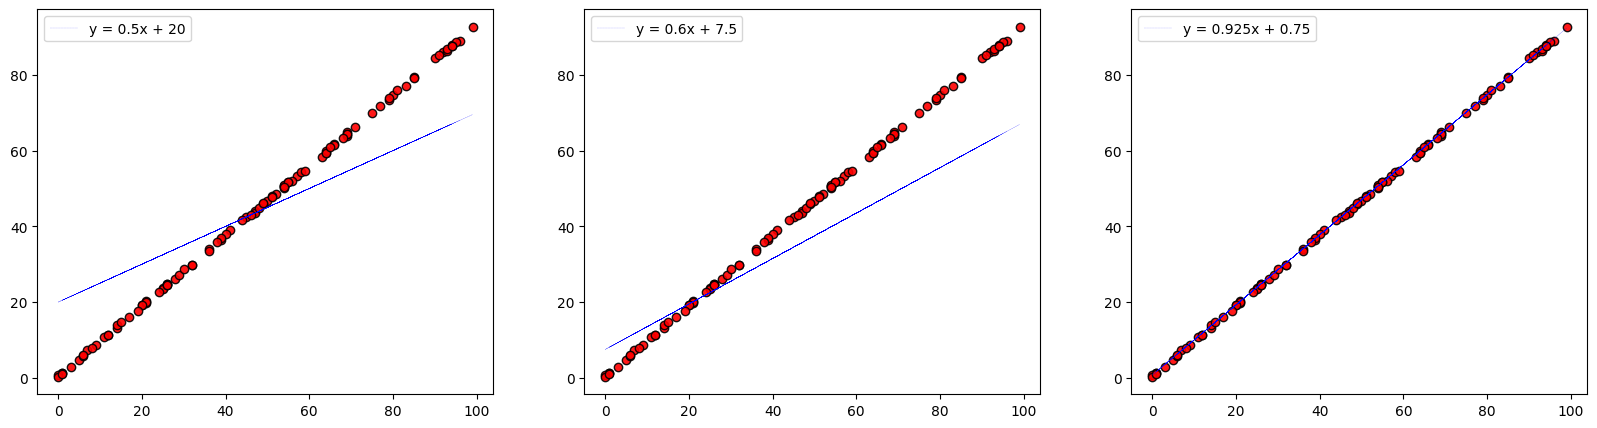

In [6]:
# the red markers show the actual data points.

fig, (axe_0, axe_1, axe_2) = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(20, 5)

axe_0.scatter(x, y, marker = 'o', edgecolor = "black", alpha = 0.9, color = "red")
axe_0.plot(x, x * 0.5 + 20, linestyle = '--', linewidth = 0.1, color = "blue", label = "y = 0.5x + 20")
axe_0.legend()

axe_1.scatter(x, y, marker = 'o', edgecolor = "black", alpha = 0.9, color = "red")
axe_1.plot(x, x * 0.6 + 7.5, linestyle = '--', linewidth = 0.1, color = "blue", label = "y = 0.6x + 7.5")
axe_1.legend()

axe_2.scatter(x, y, marker = 'o', edgecolor = "black", alpha = 0.9, color = "red")
axe_2.plot(x, x * 0.925 + 0.75, linestyle = '--', linewidth = 0.1, color = "blue", label = "y = 0.925x + 0.75")
axe_2.legend()

plt.show()

In [7]:
# trying y = wx type univariate model

cost_function(predictions = x * 0.5, targets = y)

281.75156752030585

In [8]:
# trying a y = wx + b form model

cost_function(predictions = x * 0.6 + 10.569, targets = y)

56.43986280472372

In [9]:
# that's a reasonably low deviation

cost_function(predictions = x * 0.9 + 0.69, targets = y)

0.8878143687622368

In [10]:
# compute this m using a loop

slopes = np.arange(start = -10, stop = 10, step = 0.001)
epsilon = 0.10
gradient = 0

for m in slopes:
    if cost_function(m * x + 0.069, y) <= epsilon:
        gradient = m
        break

In [11]:
# that's impressive :)

gradient

0.9279999999939434

In [12]:
# woohoo :)

cost_function(gradient * x + 0.069, y)

0.09987318935191959

In [13]:
# a visual representation of what a cost function does

# x is our predictor
x = np.random.randint(low = 0, high = 100, size = 100)

# m is our slope 
m = 0.54561

# y is our real targets
y = m * x + np.random.rand(100) # with a little jitter

# let's say our linear model is y = 0.6987 x + 0.2345645
y_hat = 0.6987 * x + 0.2345645

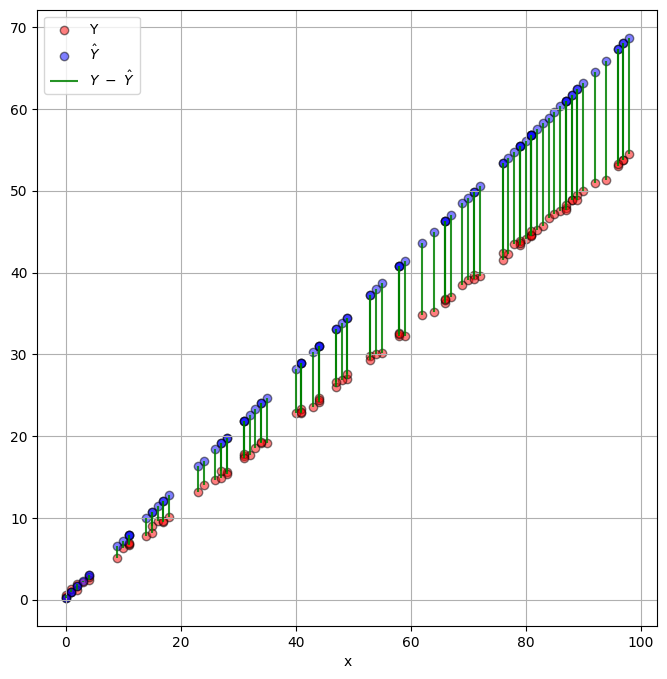

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.scatter(x, y, color = "red", alpha = 0.5, edgecolor = "black", label = 'Y')
axes.scatter(x, y_hat, color = "blue", alpha = 0.5, edgecolor = "black", label = r"$\hat{Y}$")
axes.vlines(x, y, y_hat, color = "green", alpha = 0.85, label = r"$Y~-~\hat{Y}$")

axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("")
axes.legend()
plt.show()

In [15]:
# what the cost function computes is the half (/2N) of the average of lengths of these vertical differences.

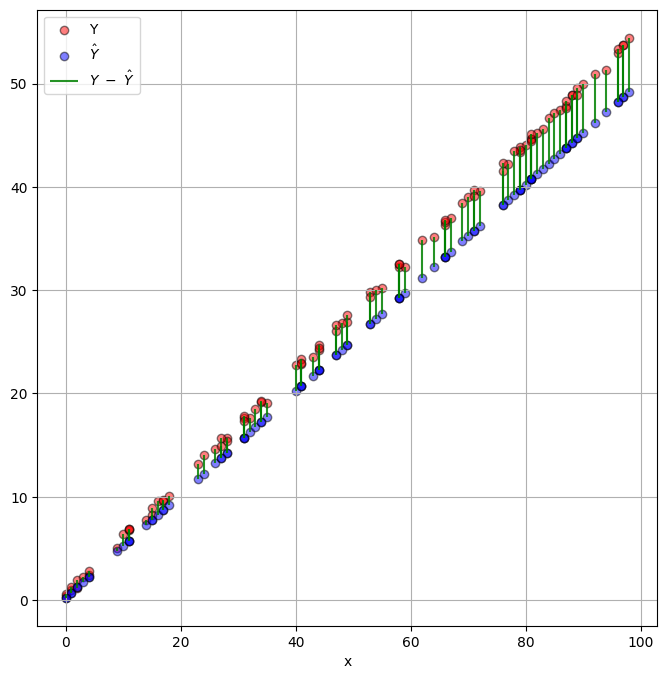

In [16]:
# as our parameters become closer to the actual linear relationship that exists between x and y, these vertical lines will become shorter.
y_hat = 0.5 * x + 0.22254

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.scatter(x, y, color = "red", alpha = 0.5, edgecolor = "black", label = 'Y')
axes.scatter(x, y_hat, color = "blue", alpha = 0.5, edgecolor = "black", label = r"$\hat{Y}$")
axes.vlines(x, y, y_hat, color = "green", alpha = 0.85, label = r"$Y~-~\hat{Y}$")

axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("")
axes.legend()
plt.show()

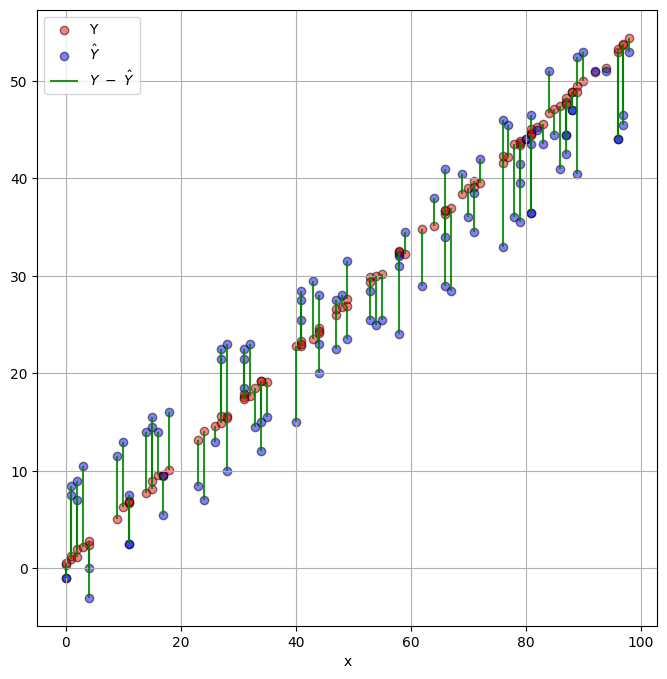

In [17]:
# THE VERTICAL JITTER DOESN'T NECESSARILY HAVE TO HAVE THE REAL TARGETS ABOVE THE PREDICTIONS FOR ALL VALUES OF X
# THERE CAN BE INVERSIONS TO THIS RELATIVITY.

y_hat = 0.5 * x + np.random.randint(low = -5, high = 10, size = 100) # this time, making the vertical jitter more pronounced and realistic.

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.scatter(x, y, color = "red", alpha = 0.5, edgecolor = "black", label = 'Y')
axes.scatter(x, y_hat, color = "blue", alpha = 0.5, edgecolor = "black", label = r"$\hat{Y}$")
axes.vlines(x, y, y_hat, color = "green", alpha = 0.85, label = r"$Y~-~\hat{Y}$")

axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("")
axes.legend()
plt.show()

In [18]:
# as we iterate through all prospecive values of slope, at one point the cost function will return a minimum value.
# the value of m where the cost function returned the lowest value will be our best bet for m

x = np.random.randint(low = 0, high = 100, size = 100)
m = 0.32156745
y = m * x + np.random.rand(100)

slopes = np.arange(start = -10, stop = 10, step = 0.001)  # all candidates for m
epsilon = 0.10 # minimum tolerable difference between the targets and predictions (in the form of cost function's return value)
diffs = np.zeros(shape = slopes.size)

for i, m in enumerate(slopes):
    diffs[i] = cost_function(m * x + 0.069, y)   # tuning the w parameter, while maintaining b constant

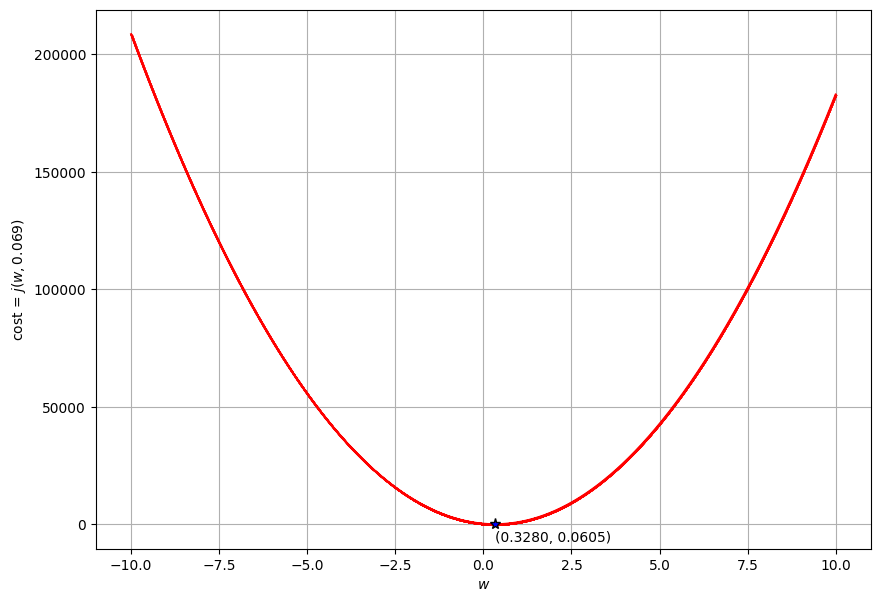

In [19]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 7)
axes.plot(slopes, diffs, color = "red", marker = 'o', ms = 0.1)

miny_pos = np.argmin(diffs)
axes.plot(slopes[miny_pos], diffs[miny_pos], color = "blue", marker = '*', ms = 8, mec = "black")
axes.text(slopes[miny_pos], diffs[miny_pos] - 7500, color = "black", s = f"({slopes[miny_pos]:.4f}, {diffs[miny_pos]:.4f})")

axes.set_xlabel(r"$w$")
axes.set_ylabel(r"cost = $j(w, 0.069)$")
axes.grid()
plt.show()

In [20]:
# :)))

print(f"real slope = {0.32156745:.4f}, deduced slope = {slopes[miny_pos]:.4f}")

real slope = 0.3216, deduced slope = 0.3280


In [21]:
# difference is negligible :)

np.abs(0.32156745 - slopes[miny_pos])

0.0064325499942760045

## ___Changing both `w` and `b`___
----------------

In [22]:
# so far, we've seen how the cost function's result varies with the parameter w (slope)
# this maintained the b (bias term or the intercept) constant.
# now let's explore what happens when we oscillate both.

In [23]:
X = np.random.randint(low = -3, high = 3, size = 1000)
W = 1.064564
B = 1.05486
Y = W * X + B

In [24]:
# now we need to use gradient descent to figure out our best fits for m and b

weights = np.arange(start = -10, stop = 10, step = 0.1)
biases = weights

In [25]:
costs = [np.array([cost_func(w * X + b, Y) for b in biases]) for w in weights]

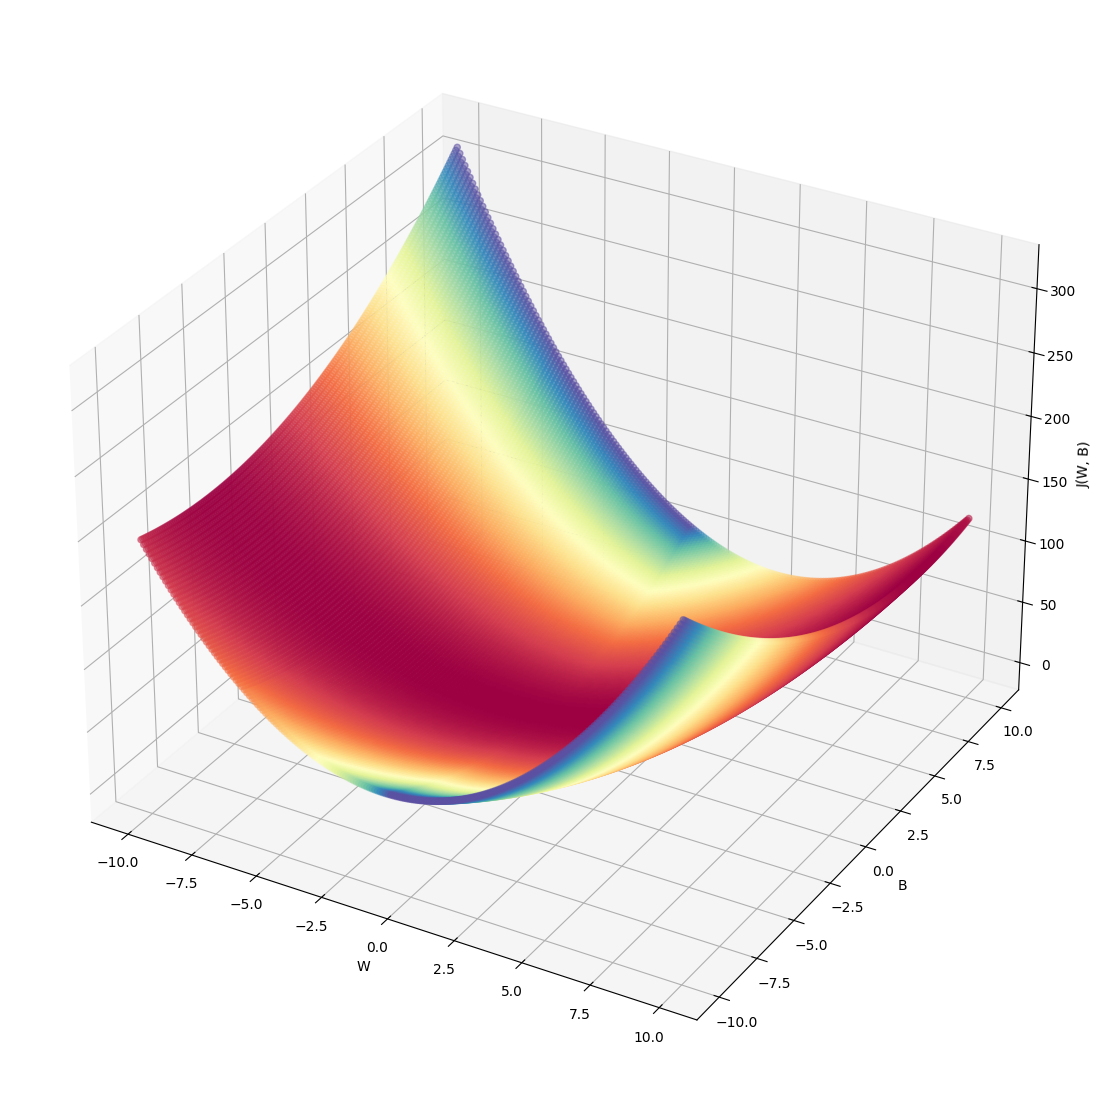

In [26]:
fig = plt.figure(figsize = (14, 14))
axes = fig.add_subplot(projection = "3d")

for i, w in enumerate(weights):
    axes.scatter(xs = w, ys = biases, zs = costs[i], c = costs[i], cmap = "Spectral", alpha = 0.5)
axes.set_xlabel('W')
axes.set_ylabel('B')
axes.set_zlabel('J(W, B)')
axes.grid()

plt.show()

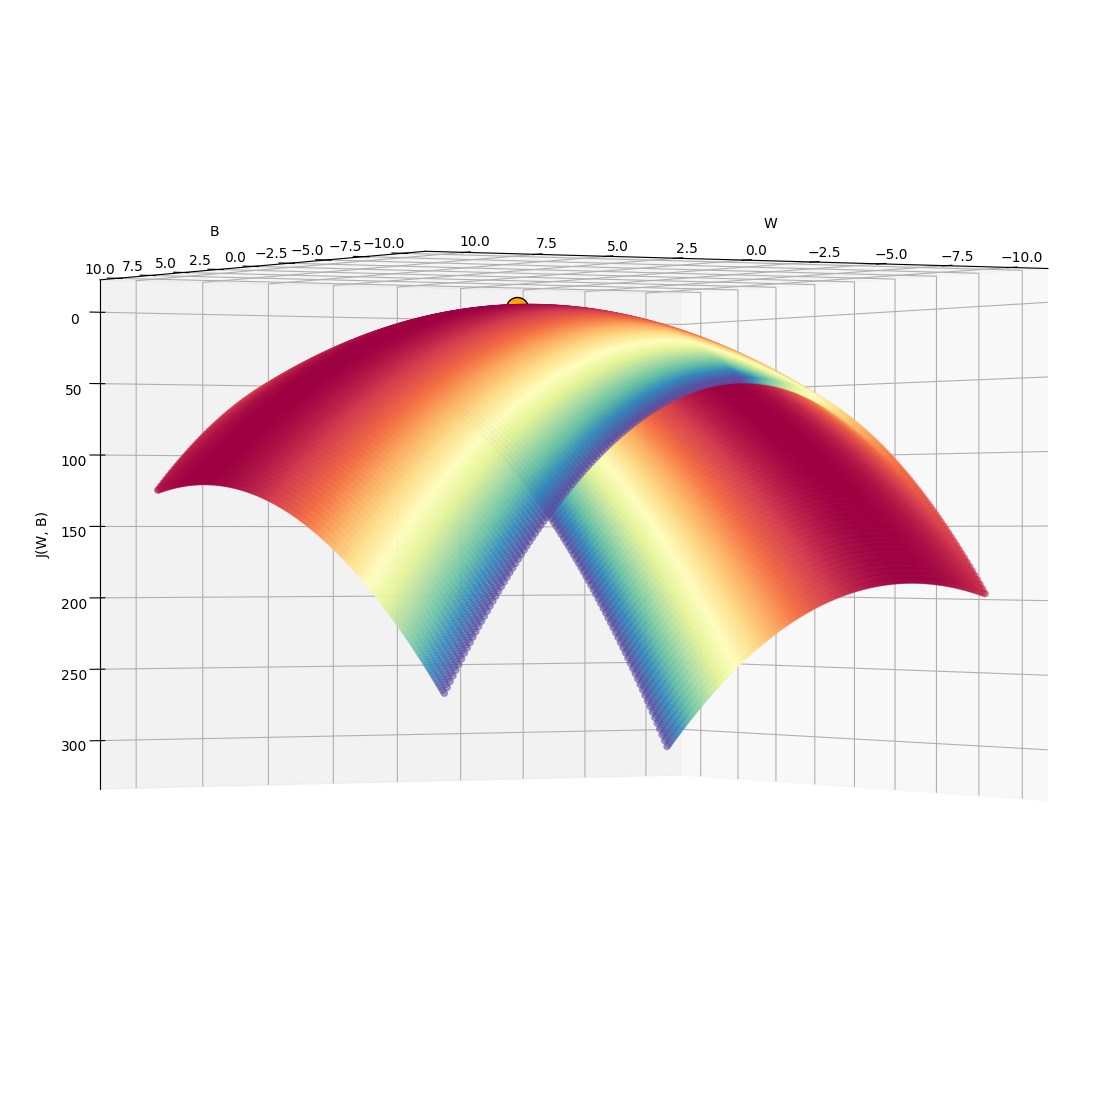

In [27]:
fig = plt.figure(figsize = (14, 14))
axes = fig.add_subplot(projection = "3d")

for i, w in enumerate(weights):
    axes.scatter(xs = w, ys = biases, zs = costs[i], c = costs[i], cmap = "Spectral", alpha = 0.5)
axes.scatter(W, B, cost_function(Y, Y), c = "orange", s = 250, edgecolor = "black")        
axes.set_xlabel('W')
axes.set_ylabel('B')
axes.set_zlabel('J(W, B)')
axes.grid()
axes.azim = 120
axes.elev = 180 
plt.show()

In [28]:
# this 3D graphic shows how the mean least squared errors vary with w and b

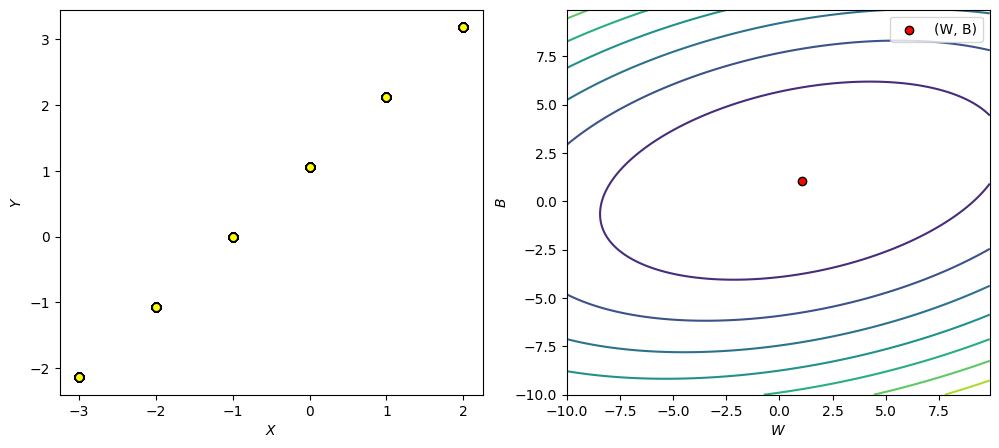

In [29]:
# a better way to visualize this is to use contour plots, which bin the data points based on z axis (horizontally), and delimit them on the xy plane
# so, we end up with a 2D plot that includes the information encoded by the third variable
# the concentric rings on the xy plane indicate points with identical values for the third variable.

fig, (axes_0, axes_1) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 5)

axes_0.scatter(X, Y, color = "yellow", edgecolor = "black")
axes_0.set_xlabel('$X$')
axes_0.set_ylabel('$Y$')

axes_1.contour(weights, biases, costs)
axes_1.scatter(W, B, c = "red", edgecolor = "black", label = "(W, B)")
axes_1.set_xlabel('$W$')
axes_1.set_ylabel('$B$')
axes_1.legend()

plt.show()

In [30]:
# the best fit for w and b is the centre of the concentric rings.
# which is further proved by the overlap with our predetermined W and B values.
# REMEMBER, THE BEST FIT WILL BE LOCATED AT THE CENTRE OF THE INNERMOST CIRCLE, NOT AT THE CENTRE OF THE PLOT
# IF THE 3D PLOT IS ASYMMETRIC, THE BEST FIT WILL NOT BE POSITIONED AT THE CENTRE OF THE PLOT, BUT STILL BE AT THE CENTRE OF THE INNERMOST RING

In [43]:
# LET'S LOOK AT A POOR APPROPRIATION OF A MODEL

X = np.random.randint(low = -100, high = 100, size = 500)
W = 1.32654
B = 0
Y = M * X + np.random.normal(loc = 0, scale = 20, size = 500)  # B is implicitly 0, as we use a 0 centred normal distribution

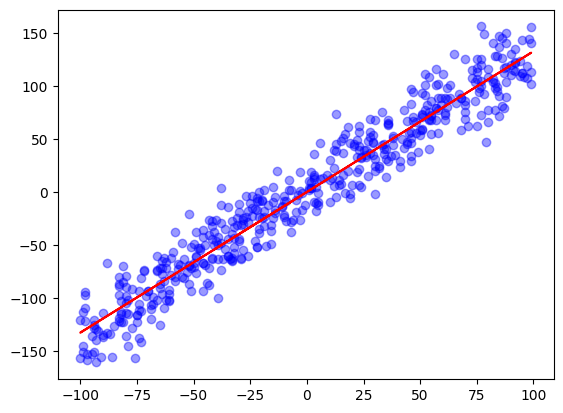

In [44]:
fig, axes = plt.subplots()
axes.scatter(X, Y, color = "blue", alpha = 0.4)
axes.plot(X, W * X, color = "red")
plt.show()

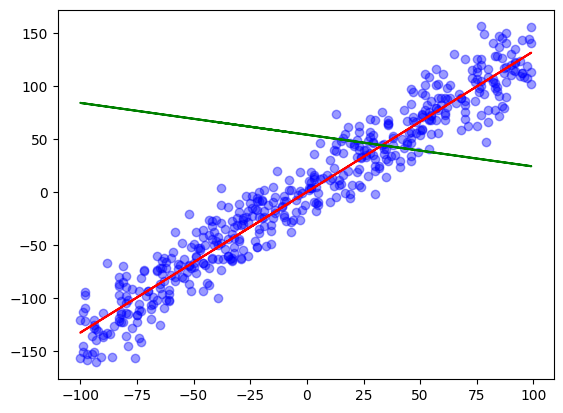

In [45]:
# the red line indeed is a good fit :)
# but consider a terrible fit, y = -0.3x + 54, the green line

fig, axes = plt.subplots()
axes.scatter(X, Y, color = "blue", alpha = 0.4)
axes.plot(X, W * X, color = "red")
axes.plot(X, -0.3 * X + 54, color = "green")
plt.show()

In [46]:
# let's see how this model will get positioned in a 3D plot

w_candidates = np.arange(start = -5, stop = 5, step = 0.01)
b_candidates = np.arange(start = -10, stop = 10, step = 0.02)

e = np.array([np.array([cost_func(w * X + b, Y) for b in b_candidates]) for w in w_candidates])

In [47]:
# .min() looks good :)

e.min(), e.max()

(188.7306482314678, 65054.778629533124)

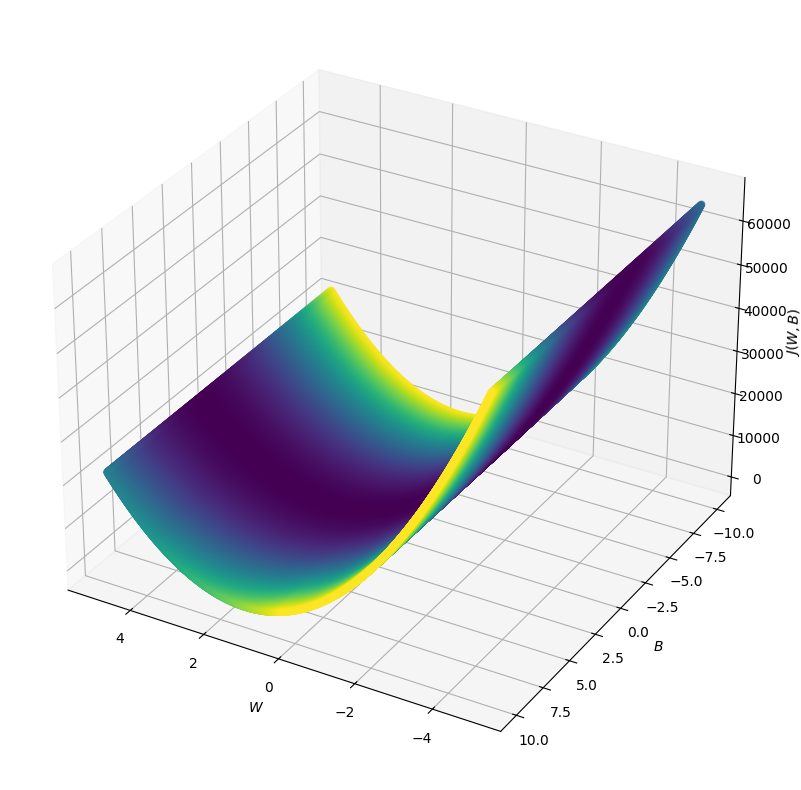

In [48]:
fig = plt.figure()
fig.set_size_inches(10, 10)
axes = fig.add_subplot(projection = "3d")
for i, w in enumerate(w_candidates):
    axes.scatter(w, b_candidates, e[i], c = e[i])
axes.set_xlabel('$W$')
axes.set_ylabel('$B$')
axes.set_zlabel('$J(W, B)$')
axes.azim = 120
plt.show()

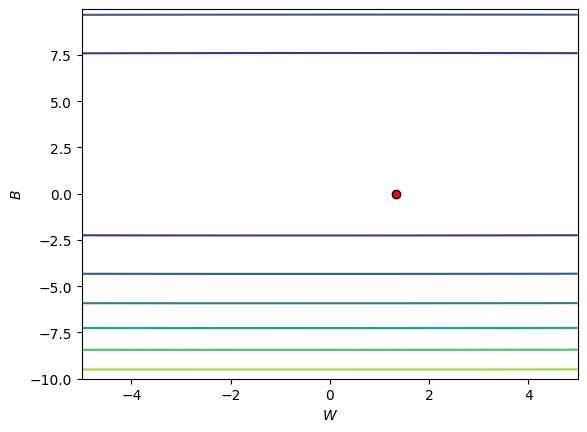

In [49]:
# the 3D plot shows that the cost doesn't change much with B, the bias term for this model (true)
# SO, INSTEAD OF A SINGLE POINT WHERE THE COST FUNCTION IS LOWEST, WE HAVE A STRAIGHT LINE THAT RUNS PARALLEL TO THE B AXIS
# THAT HOUSES ALL POINTS IN THIS 3D PLOT WHERE THE COST FUNCTION IS LOWEST
# and the contour plot is in agreement with that too, as the lines run parallel to the x axis (W)
# B has no significant impact on the cost!

fig, axes = plt.subplots()
axes.contour(w_candidates, b_candidates, e)
axes.scatter(W, B, color = "red", edgecolor = "black")
axes.set_xlabel('$W$')
axes.set_ylabel('$B$')
plt.show()

In [38]:
# our predictior values are in the range of -100 to 100
# and the candidates for slope are in the range of -5 to 5
# and the candidates for bias are in the range of -10 to 10

# the wx term is substantially greater than the cognate bias term!
# to get concentric rings as before, we need to make our bias term more influential.

In [39]:
# the values for w and b that gives you the lowermost point in the 3D space with the cost on the z axis is the 
# pair of values that'll best define the relationship between the predictor and the target!

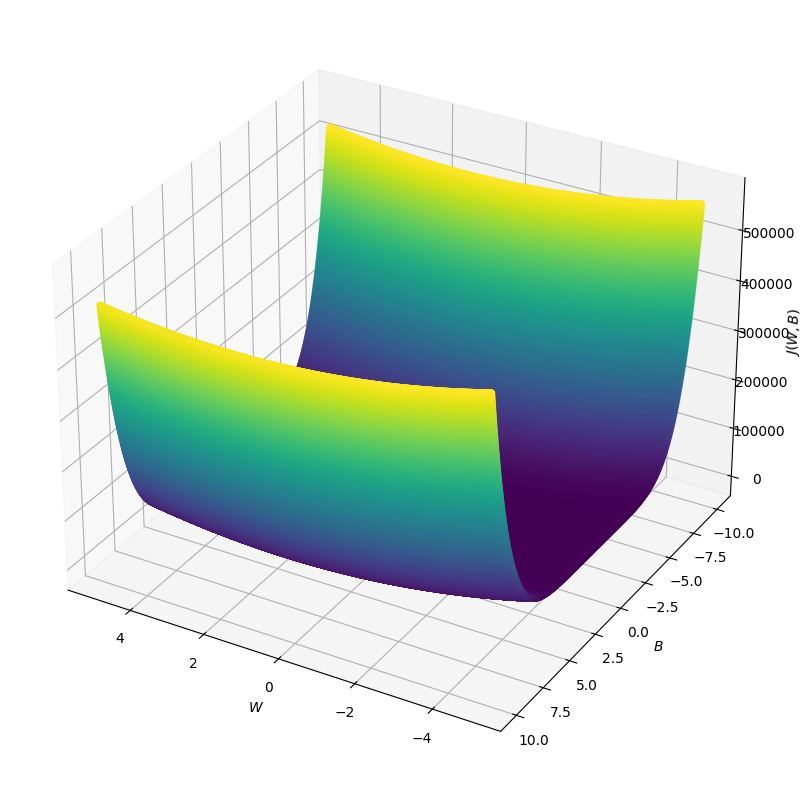

In [50]:
# SEE WHAT HAPPENS WHEN WE MAKE THE INFLUENCE OF THE BIAS TERM MORE PRONOUNCED;

w_candidates = np.arange(start = -5, stop = 5, step = 0.01)
b_candidates = np.arange(start = -10, stop = 10, step = 0.02)

e = np.array([np.array([cost_func(w * X + np.power(b, 3), Y) for b in b_candidates]) for w in w_candidates])  
# we are raising the bias term to the power 3
# the model is no longer a linear model.

fig = plt.figure()
fig.set_size_inches(10, 10)
axes = fig.add_subplot(projection = "3d")
for i, w in enumerate(w_candidates):
    axes.scatter(w, b_candidates, e[i], c = e[i])
axes.set_xlabel('$W$')
axes.set_ylabel('$B$')
axes.set_zlabel('$J(W, B)$')
axes.azim = 120
plt.show()

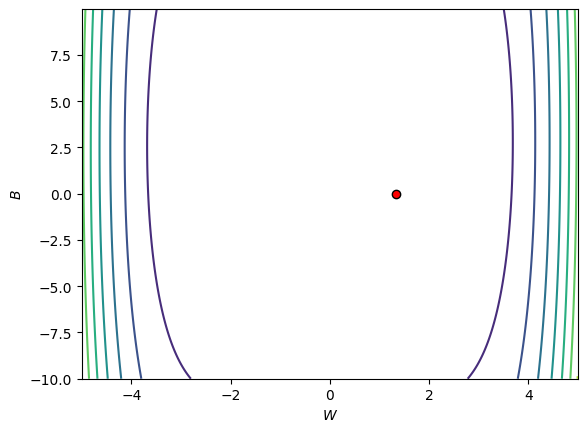

In [51]:
# NOW BIAS HAS BECOME MORE INFLUENTIAL THAN THE WEIGHT
# CONFIRM THAT WITH THE CONTOUR PLOT

fig, axes = plt.subplots()
axes.contour(w_candidates, b_candidates, e)
axes.scatter(W, B, color = "red", edgecolor = "black")
axes.set_xlabel('$W$')
axes.set_ylabel('$B$')
plt.show()